In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import collections
#import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load data

In [2]:
#load file- work computer
#C:\Users\liz\Desktop\course-materials-2020\fMRI_HCP
#df = pd.read_csv(r'C:\Users\liz\Desktop\course-materials-2020\fMRI_HCP\HCP_behavioralData.csv',header = 1)
df = pd.read_csv("/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/HCP_behavioralData.csv")

## First look at the data

In [3]:
#look at 10 first rows
df.head(10)
#look at colums (name of variables)
df.columns
#size of data
df.shape

df.describe()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,4.4,101.12,87.11,1.0,50.1,105.57,102.32,1.92,0.0,1.92
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80


Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=582)

(1206, 582)

,Subject,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,...,1196.000000,1204.000000,1204.000000,1201.000000,1205.000000,1200.000000,1200.000000,1198.000000,1195.000000,1195.000000
mean,374551.585406,1.478441,1.400498,3.509950,87.213267,88.219569,89.718076,89.852736,89.631675,87.027114,...,4.404682,110.421321,97.727500,1.449625,45.847718,95.166983,93.998533,1.845467,0.581590,1.822251
std,272686.898230,0.635688,0.628216,1.215181,31.027886,29.942161,30.384864,30.163559,30.492092,33.566043,...,1.513823,9.107963,11.273251,1.783069,7.679288,14.583412,14.837851,0.541393,0.973172,0.542893
min,100004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.400000,82.740000,59.860000,0.000000,38.600000,56.350000,59.500000,1.560000,0.000000,1.080000
25%,154254.250000,1.000000,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,3.600000,101.120000,87.110000,0.000000,38.600000,84.070000,83.220000,1.800000,0.000000,1.760000
50%,212166.500000,2.000000,1.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,4.400000,108.790000,98.040000,1.000000,45.900000,95.360000,94.970000,1.800000,0.000000,1.800000
75%,586310.500000,2.000000,2.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,5.200000,122.250000,110.450000,2.000000,52.200000,105.570000,102.920000,1.880000,1.000000,1.840000
max,996782.000000,2.000000,2.000000,4.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,14.000000,122.250000,111.410000,10.000000,75.300000,134.650000,131.380000,15.000000,17.000000,15.000000


## Detect missing values in the data

In [4]:
#Detect missing values in the data
#How many Nulls for each field?
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
type(null_columns)

dMRI_3T_ReconVrs         141
fMRI_3T_ReconVrs         108
7T_fMRI_Mov_Vrs         1022
QC_Issue                1049
MRsession_Scanner_3T      93
                        ... 
Taste_Unadj                6
Taste_AgeAdj               6
Mars_Log_Score             8
Mars_Errs                 11
Mars_Final                11
Length: 470, dtype: int64

pandas.core.indexes.base.Index

## Exclude missing values from the data

In [5]:
#Percent of missing values for each field
print (df.isnull().mean())
#Keep only the fields where there is less than 25% of missing values
df = df.loc[:, df.isnull().mean() < .25]
#The remained fields
print(df.columns)
#df.head(10)
df.shape

#Delete rows with missing values
#percent of 'normal' values for each row
df.notnull().mean(axis=1)
#Keep only the rows where there are no missing values 
df = df.loc[df.notnull().mean(axis=1) == 1, :]
df.head(10)
df.shape

Subject           0.000000
Release           0.000000
Acquisition       0.000000
Gender            0.000000
Age               0.000000
                    ...   
Taste_Unadj       0.004975
Taste_AgeAdj      0.004975
Mars_Log_Score    0.006633
Mars_Errs         0.009121
Mars_Final        0.009121
Length: 582, dtype: float64
Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=567)


(1206, 567)

0       0.455026
1       1.000000
2       1.000000
3       1.000000
4       0.994709
          ...   
1201    1.000000
1202    0.994709
1203    1.000000
1204    1.000000
1205    1.000000
Length: 1206, dtype: float64

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(845, 567)

In [6]:
#Delete fields with only one unique value
#Number of unique values for each field
df.nunique()
#Keep only the fields where there is more than one unique value
df = df.loc[:, df.nunique() > 1]
#The remained fields
print(df.columns)
df.head(10)
df.shape

Subject           845
Release             7
Acquisition        13
Gender              2
Age                 4
                 ... 
Taste_Unadj        95
Taste_AgeAdj      178
Mars_Log_Score     11
Mars_Errs           7
Mars_Final         13
Length: 567, dtype: int64

Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=544)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,6.0,122.25,110.45,0.0,50.1,67.48,65.31,1.80,0.0,1.80
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,3.6,96.87,77.12,0.0,38.6,79.67,78.91,1.80,1.0,1.76
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,5.2,93.38,69.88,1.0,38.6,86.03,86.60,1.84,0.0,1.84


(845, 544)

In [7]:
#Save to csv
#df.to_csv('HCP_behavior_noMissing.csv')

In [8]:
#Age
df['Age'].unique

<bound method Series.unique of 1       26-30
2       26-30
3       31-35
8       26-30
9       26-30
        ...  
1199    26-30
1201    31-35
1203    26-30
1204    22-25
1205    26-30
Name: Age, Length: 845, dtype: object>

## Perceptual task - Mars contrast test

count    845.000000
mean       1.815302
std        0.458903
min        1.080000
25%        1.760000
50%        1.800000
75%        1.840000
max       15.000000
Name: Mars_Final, dtype: float64

<AxesSubplot:xlabel='Mars_Final'>

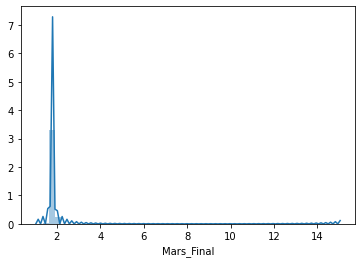

In [9]:
df['Mars_Final'].describe()
#print("Overall fully paid rate: {0:.3f}".format(y_train.mean()))
#loan amoubt distribution
sns.distplot(df['Mars_Final'])
#sns.distplot(df['Age'])

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
8      101309    S500         Q06      M  26-30              True         1   
9      101410    S500         Q06      M  26-30             False         2   
...       ...     ...         ...    ...    ...               ...       ...   
1199   991267    S500         Q06      M  26-30              True         2   
1201   992774      Q2         Q02      M  31-35              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='Mars_Final'>

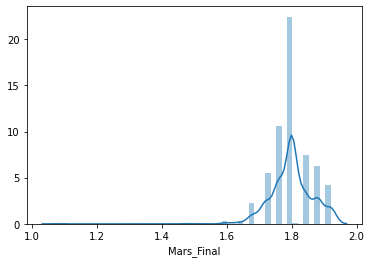

In [10]:
#z-score
df['z_score_mars'] = stats.zscore(df['Mars_Final'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_mars'].abs()<=3]
df.describe

sns.distplot(df['Mars_Final'])

## Value-based task - delay discounting

count    844.000000
mean       0.514184
std        0.281555
min        0.015625
25%        0.291276
50%        0.498763
75%        0.768360
max        0.984375
Name: DDisc_AUC_40K, dtype: float64

<AxesSubplot:xlabel='DDisc_AUC_40K'>

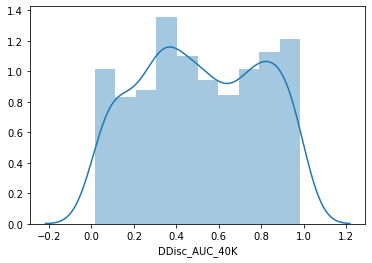

In [11]:
df['DDisc_AUC_40K'].describe()
#print("Overall fully paid rate: {0:.3f}".format(y_train.mean()))
#loan amoubt distribution
sns.distplot(df['DDisc_AUC_40K'])
#sns.distplot(df['Age'])

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
8      101309    S500         Q06      M  26-30              True         1   
9      101410    S500         Q06      M  26-30             False         2   
...       ...     ...         ...    ...    ...               ...       ...   
1199   991267    S500         Q06      M  26-30              True         2   
1201   992774      Q2         Q02      M  31-35              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='DDisc_AUC_40K'>

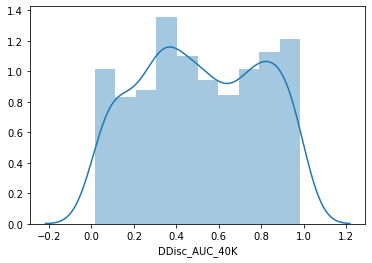

In [12]:
#z-score
df['z_score_DDisc_AUC'] = stats.zscore(df['DDisc_AUC_40K'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_DDisc_AUC'].abs()<=3]
df.describe

sns.distplot(df['DDisc_AUC_40K'])

In [13]:
#correlation
x = df['z_score_DDisc_AUC']
y = df['z_score_mars']
sc.stats.pearsonr(x, y)

(0.04885852528899782, 0.1561424490479856)

## Flanker task: selective attention

count    844.000000
mean     102.216505
std        9.994355
min       72.810000
25%       95.620000
50%      103.200000
75%      110.060000
max      123.560000
Name: Flanker_AgeAdj, dtype: float64

<AxesSubplot:xlabel='Flanker_AgeAdj'>

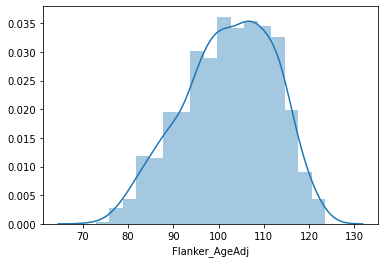

In [14]:
df['Flanker_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['Flanker_AgeAdj'])



count    844.000000
mean     103.034822
std        9.569516
min       57.790000
25%       96.547500
50%      103.115000
75%      110.250000
max      122.650000
Name: CardSort_AgeAdj, dtype: float64

<AxesSubplot:xlabel='CardSort_AgeAdj'>

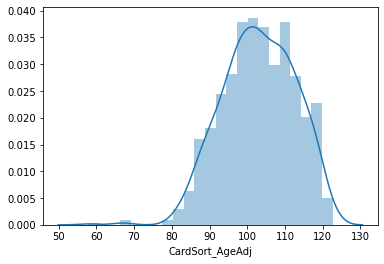

In [15]:
df['CardSort_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['CardSort_AgeAdj'])

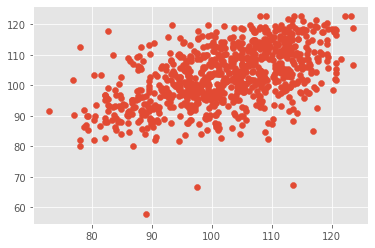

In [16]:
#Correlation between Flanker task and CardSort task
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['CardSort_AgeAdj']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
8      101309    S500         Q06      M  26-30              True         1   
9      101410    S500         Q06      M  26-30             False         2   
...       ...     ...         ...    ...    ...               ...       ...   
1199   991267    S500         Q06      M  26-30              True         2   
1201   992774      Q2         Q02      M  31-35              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='Flanker_AgeAdj'>

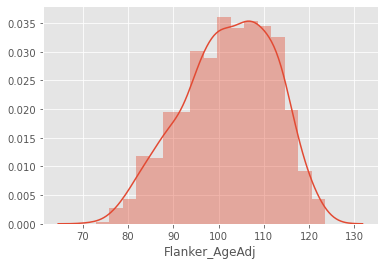

In [26]:
#z-score
df['z_score_Flanker'] = stats.zscore(df['Flanker_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_Flanker'].abs()<=3]
df.describe

sns.distplot(df['Flanker_AgeAdj'])

### z_scoes pf Mars contrast and Delay discount

In [29]:
#correlation
x = df['z_score_DDisc_AUC']
y = df['z_score_Flanker']
sc.stats.pearsonr(x, y)

(0.054531830851745455, 0.11340521228879527)

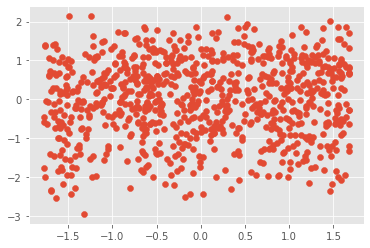

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_Flanker']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

In [19]:
df['z_score_mars']

1       0.053852
2      -0.120580
3      -0.295012
8      -0.033364
9      -0.033364
          ...   
1199    0.053852
1201   -0.120580
1203   -0.120580
1204   -0.033364
1205    0.053852
Name: z_score_mars, Length: 844, dtype: float64

In [20]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType'] = ""

for index, row in df.iterrows():
    if row['z_score_mars'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType'][index] = 0
        #print(row)
    elif row['z_score_mars'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType'][index] = 1
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType'][index] = 2
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType'][index]= 3

df['GroupType'].unique()



/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/lizakson/mini

array([3, 0, 1, 2], dtype=object)

In [21]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,GroupType
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,1.0,49.7,72.63,72.03,1.84,0.0,1.84,0.053852,-1.649623,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,38.6,71.69,71.76,1.76,0.0,1.76,-0.120580,-0.720448,0
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,52.6,114.01,113.59,1.76,2.0,1.68,-0.295012,-0.329899,0
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,0.0,38.6,106.39,104.39,1.80,0.0,1.80,-0.033364,1.547886,1
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,3.0,50.1,73.86,71.78,1.80,0.0,1.80,-0.033364,-0.628364,0
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,0.0,38.6,112.11,111.70,1.84,1.0,1.80,-0.033364,1.454413,1
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,0.0,50.1,67.48,65.31,1.80,0.0,1.80,-0.033364,-0.881943,0
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,2.0,54.3,84.07,82.37,1.92,0.0,1.92,0.228284,-1.324782,3
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,0.0,38.6,79.67,78.91,1.80,1.0,1.76,-0.120580,1.587681,1
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,1.0,38.6,86.03,86.60,1.84,0.0,1.84,0.053852,0.893576,2


GroupType
0    102.124153
1    102.283682
2    103.438485
3    100.978770
Name: Flanker_AgeAdj, dtype: float64


<AxesSubplot:xlabel='GroupType'>

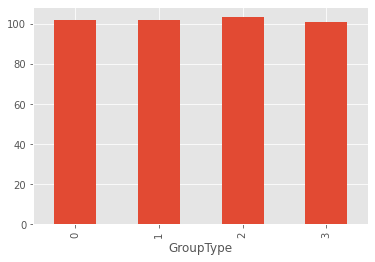

In [22]:
#Show performance in Flanker task according to the 4 groups
FT = df.groupby(['GroupType'])['Flanker_AgeAdj'].mean()
print(FT)
FT.plot(kind='bar')

In [23]:
#from: https://www.pythonfordatascience.org/anova-python/
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Flanker_AgeAdj ~ C(GroupType)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GroupType),387.928932,3.0,1.295921,0.274593
Residual,83816.915257,840.0,NaN,NaN


In [24]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare'] = ""

for index, row in df.iterrows():
    df['z_score_compare'][index] = abs(row['z_score_mars'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare']

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1         1.70347
2        0.599868
3       0.0348868
8         1.58125
9           0.595
          ...    
1199     0.679439
1201      1.63732
1203     0.174752
1204        0.595
1205     0.531826
Name: z_score_compare, Length: 844, dtype: object

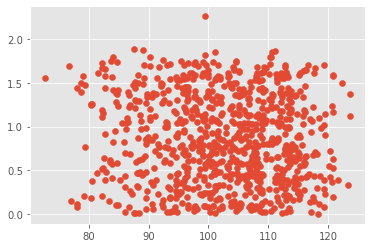

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

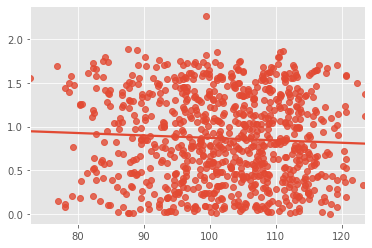

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['z_score_compare']

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [ ]:
#correlation

sc.stats.pearsonr(x, y)

In [ ]:
df['z_score_compare'].describe()

#Scores distribution
sns.distplot(df['z_score_compare'])

In [ ]:
# apply log(x+1) element-wise to a subset of columns
Mars_log = df['Mars_Final'].apply(np.log)

#df_log = df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
#df_log.columns = 'log_' + df_log.columns

# shift the index
#df_log.index = df_log.index + 1

#df.columns

In [ ]:
import scipy

scipy.stats.pearsonr(x, y)

### z_scores of Flanker task and Delay discount

In [30]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType_f'] = ""

for index, row in df.iterrows():
    if row['z_score_Flanker'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType_f'][index] = 0
        #print(row)
    elif row['z_score_Flanker'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType_f'][index] = 1
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType_f'][index] = 2
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType_f'][index]= 3

df['GroupType_f'].unique()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.i

array([3, 0, 2, 1], dtype=object)

In [31]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,GroupType,z_score_compare,z_score_Flanker,GroupType_f
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,72.03,1.84,0.0,1.84,0.053852,-1.649623,3,1.70347,1.435010,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.76,1.76,0.0,1.76,-0.120580,-0.720448,0,0.599868,-0.031687,0
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,113.59,1.76,2.0,1.68,-0.295012,-0.329899,0,0.0348868,1.130657,3
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,104.39,1.80,0.0,1.80,-0.033364,1.547886,1,1.58125,0.115483,2
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,71.78,1.80,0.0,1.80,-0.033364,-0.628364,0,0.595,-0.163840,0
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,111.70,1.84,1.0,1.80,-0.033364,1.454413,1,1.48778,-1.313170,1
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,65.31,1.80,0.0,1.80,-0.033364,-0.881943,0,0.848579,0.327729,3
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,82.37,1.92,0.0,1.92,0.228284,-1.324782,3,1.55307,-2.944056,0
16,102614,S1200,Q12,M,22-25,True,2,2,4,100.0,...,78.91,1.80,1.0,1.76,-0.120580,1.587681,1,1.70826,1.049564,2
17,102715,S1200,Q12,M,26-30,True,2,2,4,100.0,...,86.60,1.84,0.0,1.84,0.053852,0.893576,2,0.839724,-0.892683,1


In [32]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare_f'] = ""

for index, row in df.iterrows():
    df['z_score_compare_f'][index] = abs(row['z_score_Flanker'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare_f']

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1        3.08463
2       0.688761
3        1.46056
8         1.4324
9       0.464524
          ...   
1199      2.1527
1201     3.11783
1203     1.23667
1204    0.806947
1205    0.654987
Name: z_score_compare_f, Length: 844, dtype: object

## Prediction using PTN data

### Pre-processing - exclusion of subjects according to the behavioral data

In [33]:
#path to matrices
path = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/HCP_PTN1200_recon2/netmats2_15.txt'
#path = '/mnt/c/Users/liz/Desktop/course-materials-2020/fMRI_HCP/HCP_PTN1200_recon2/netmats1.txt'
path_sub = '/mnt/c/Users/liz/Contacts/Desktop/course-materials-2020/fMRI_HCP/HCP_PTN1200_recon2/subjectIDs_recon2.txt'

netmats = np.loadtxt(path)
subject_IDs = np.loadtxt(path_sub)

subject_IDs 

netmats.shape

array([100206., 100610., 101006., 101107., 101309., 101915., 102008.,
       102109., 102311., 102513., 102614., 102715., 103010., 103111.,
       103212., 104012., 104416., 104820., 105014., 105620., 105923.,
       106016., 106521., 106824., 107018., 107321., 107422., 107725.,
       108020., 108121., 108222., 108323., 108525., 108828., 109123.,
       109325., 109830., 110007., 110613., 111211., 111413., 111716.,
       112112., 112314., 112516., 112920., 113316., 113922., 114217.,
       114318., 114419., 114621., 114823., 115017., 115219., 115724.,
       115825., 116524., 116726., 117021., 117930., 118023., 118124.,
       118225., 118528., 118831., 119025., 119126., 120414., 120515.,
       120717., 121416., 121618., 121921., 122317., 122620., 122822.,
       123420., 123521., 123723., 123824., 123925., 124220., 124624.,
       124826., 125222., 125424., 126426., 126628., 127226., 127327.,
       127630., 127731., 127832., 128026., 128127., 128935., 129129.,
       129331., 1296

(812, 225)

In [34]:
#Exclude subjects in PTN data so it would be the same as in the behavioral data
df = df[df['Subject'].isin(subject_IDs)]
df

df['Subject']

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,GroupType,z_score_compare,z_score_Flanker,GroupType_f,z_score_compare_f
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,1.84,0.0,1.84,0.053852,-1.649623,3,1.70347,1.435010,3,3.08463
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,1.80,0.0,1.80,-0.033364,1.547886,1,1.58125,0.115483,2,1.4324
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,1.84,1.0,1.80,-0.033364,1.454413,1,1.48778,-1.313170,1,2.76758
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,1.80,0.0,1.80,-0.033364,-0.881943,0,0.848579,0.327729,3,1.20967
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,1.92,0.0,1.92,0.228284,-1.324782,3,1.55307,-2.944056,0,1.61927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,989987,S1200,Q13,M,31-35,True,2,2,4,100.0,...,1.80,0.0,1.80,-0.033364,1.481251,1,1.51462,0.468892,2,1.01236
1198,990366,S900,Q10,M,22-25,True,2,1,4,100.0,...,1.80,0.0,1.80,-0.033364,-1.733841,0,1.70048,-0.069731,0,1.66411
1199,991267,S500,Q06,M,26-30,True,2,1,4,100.0,...,1.84,0.0,1.84,0.053852,-0.625587,3,0.679439,1.527116,3,2.1527
1203,994273,S500,Q06,M,26-30,True,1,1,4,100.0,...,1.80,1.0,1.76,-0.120580,0.054173,1,0.174752,1.290843,2,1.23667


1       100206
8       101309
11      101915
12      102008
15      102513
         ...  
1197    989987
1198    990366
1199    991267
1203    994273
1205    996782
Name: Subject, Length: 655, dtype: int64

In [35]:
#Find the subjects that are excluded in the behavior data
subject_IDs.shape
subjectBehavior = df['Subject']
subjectBehavior.shape

#difference between behavior and fMRI data sets
subjectDifference = np.setdiff1d(subject_IDs, subjectBehavior)
subjectDifference.shape

(812,)

(655,)

(157,)

In [36]:
#Exclude the subjects that are not in the behavior data from the fMRI data
id_to_array = dict(zip(subject_IDs,range(len(subject_IDs))))
id_to_array
netmats = np.delete(netmats,[id_to_array[sub] for sub in subjectDifference], axis=0)

{100206.0: 0,
 100610.0: 1,
 101006.0: 2,
 101107.0: 3,
 101309.0: 4,
 101915.0: 5,
 102008.0: 6,
 102109.0: 7,
 102311.0: 8,
 102513.0: 9,
 102614.0: 10,
 102715.0: 11,
 103010.0: 12,
 103111.0: 13,
 103212.0: 14,
 104012.0: 15,
 104416.0: 16,
 104820.0: 17,
 105014.0: 18,
 105620.0: 19,
 105923.0: 20,
 106016.0: 21,
 106521.0: 22,
 106824.0: 23,
 107018.0: 24,
 107321.0: 25,
 107422.0: 26,
 107725.0: 27,
 108020.0: 28,
 108121.0: 29,
 108222.0: 30,
 108323.0: 31,
 108525.0: 32,
 108828.0: 33,
 109123.0: 34,
 109325.0: 35,
 109830.0: 36,
 110007.0: 37,
 110613.0: 38,
 111211.0: 39,
 111413.0: 40,
 111716.0: 41,
 112112.0: 42,
 112314.0: 43,
 112516.0: 44,
 112920.0: 45,
 113316.0: 46,
 113922.0: 47,
 114217.0: 48,
 114318.0: 49,
 114419.0: 50,
 114621.0: 51,
 114823.0: 52,
 115017.0: 53,
 115219.0: 54,
 115724.0: 55,
 115825.0: 56,
 116524.0: 57,
 116726.0: 58,
 117021.0: 59,
 117930.0: 60,
 118023.0: 61,
 118124.0: 62,
 118225.0: 63,
 118528.0: 64,
 118831.0: 65,
 119025.0: 66,
 1191

In [37]:
X_features = netmats
X_features.shape

(655, 225)

Text(0.5, 1.0, 'feature matrix')

Text(0.5, 0, 'features')

Text(0, 0.5, 'subjects')

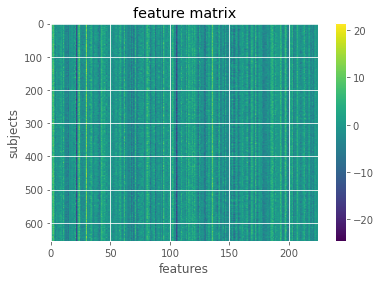

In [38]:
import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

In [ ]:
X_features[1]
unique = np.unique(X_features[1])
unique.shape
type(X_features)

In [ ]:
# Convert numpy.ndarray into dataframe
X_features = pd.DataFrame(data=X_features)  

X_features

X_features.iloc[0,:]


In [ ]:
s = 0

sns.heatmap(sc.spatial.distance.squareform(X_features.iloc[0,:]))
plt.show()

### Model

In [39]:
from sklearn.model_selection import train_test_split

# Split the sample to training/validation with a 60/40 ratio, and 
# stratify by neuroticsm score, and also shuffle the data.

score_y = df['z_score_compare_f']

X_train, X_val, y_train, y_val = train_test_split(
                                                    X_features, # x
                                                    score_y, # y
                                                    test_size = 0.4, # 60%/40% split  
                                                    shuffle = True, # shuffle dataset
                                                                    # before splitting
                                                    #stratify = score_n,  # keep
                                                                           # distribution
                                                                           # of ageclass
                                                                           # consistent
                                                                           # betw. train
                                                                           # & test sets.
                                                    random_state = 123 # same shuffle each
                                                                       # time
                                                                       )

# print the size of our training and test groups
print('training:', len(X_train),
     'testing:', len(X_val))

training: 393 testing: 262


<AxesSubplot:xlabel='z_score_compare_f'>

<AxesSubplot:xlabel='z_score_compare_f'>

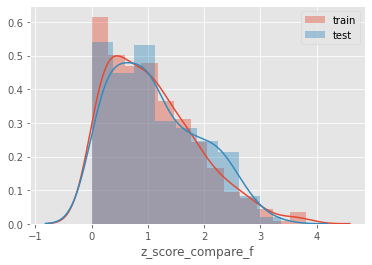

In [40]:
#Examine the distributions of y_train and y_test
sns.distplot(y_train,label='train')
sns.distplot(y_val,label='test')
plt.legend()

In [41]:
#Cross-validation
#X_train = principalComponents

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

l_svr = SVR(kernel='linear') # define the model

# predict
y_pred = cross_val_predict(l_svr, X_train, y_train, cv=10)
# scores
acc = cross_val_score(l_svr, X_train, y_train, cv=10)
mae = cross_val_score(l_svr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

In [42]:
for i in range(10):
    print('Fold {} -- Acc = {}, MAE = {}'.format(i, acc[i],-mae[i]))

Fold 0 -- Acc = -0.6126285217491168, MAE = 0.6729211126988721
Fold 1 -- Acc = -0.407869407230643, MAE = 0.7061079731142703
Fold 2 -- Acc = -0.7076629526108325, MAE = 0.9528070242244702
Fold 3 -- Acc = -0.6447636966453067, MAE = 0.8056834998035644
Fold 4 -- Acc = -0.3516777839416654, MAE = 0.7513070795027018
Fold 5 -- Acc = -0.35542082576253087, MAE = 0.7115811305691108
Fold 6 -- Acc = -0.9407305378265995, MAE = 0.7594196057121257
Fold 7 -- Acc = -0.6916921946278607, MAE = 0.8100295111195938
Fold 8 -- Acc = -0.4015042083096838, MAE = 0.7857455776268453
Fold 9 -- Acc = -0.4915699110715033, MAE = 0.8996760535902112


R2: -0.5121592082788518
MAE: 0.7854648861591513


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

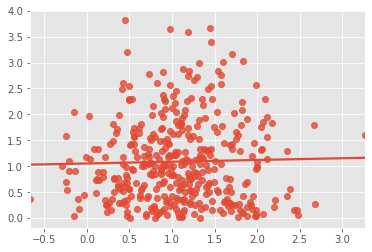

In [43]:
from sklearn.metrics import r2_score

overall_acc = r2_score(y_train, y_pred)
overall_mae = mean_absolute_error(y_train,y_pred)
print('R2:',overall_acc)
print('MAE:',overall_mae)

sns.regplot(y_pred, y_train)
plt.xlabel('Predicted Y')

### Clustering x_features: K-Means

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
kmeans.fit(X_features)

KMeans(max_iter=600, n_clusters=4)

In [45]:
kmeans.labels_

array([2, 1, 0, 2, 0, 1, 1, 1, 0, 2, 3, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1,
       0, 3, 3, 0, 3, 0, 1, 1, 2, 1, 1, 2, 3, 2, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 0, 3, 1, 0, 1, 2, 1, 0, 3, 1, 2, 0, 1, 3, 0, 3, 3, 2, 1, 1, 0,
       2, 2, 1, 1, 3, 1, 2, 2, 3, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 3, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 3, 2, 3, 1, 0, 0, 1, 1, 1, 3,
       3, 3, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2,
       1, 0, 2, 1, 1, 2, 3, 1, 1, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 3, 3, 1, 1, 0, 0, 1, 1, 1, 3, 0, 1, 0, 2, 2, 1, 1,
       3, 1, 0, 2, 1, 2, 3, 2, 1, 1, 0, 1, 3, 1, 1, 3, 0, 0, 1, 2, 1, 3,
       1, 1, 2, 2, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 3, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 0, 0, 0, 2, 2, 3, 1, 0, 1, 0, 2, 0, 3, 2, 3, 0, 0, 0, 1, 3,
       2, 0, 2, 0, 3, 0, 3, 0, 0, 2, 1, 3, 1, 0, 3, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 3, 2, 2, 3, 0, 1, 1, 0, 3,
       0, 3, 1, 2, 1, 1, 2, 2, 1, 0, 3, 3, 1, 2, 0,

In [46]:
df['K_means_group'] = kmeans.labels_

In [47]:
df.head()

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,GroupType,z_score_compare,z_score_Flanker,GroupType_f,z_score_compare_f,K_means_group
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,1.84,0.053852,-1.649623,3,1.70347,1.435010,3,3.08463,2
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,0.0,1.80,-0.033364,1.547886,1,1.58125,0.115483,2,1.4324,1
11,101915,Q3,Q04,F,31-35,True,2,2,4,100.0,...,1.0,1.80,-0.033364,1.454413,1,1.48778,-1.313170,1,2.76758,0
12,102008,S500,Q06,M,22-25,False,1,1,4,100.0,...,0.0,1.80,-0.033364,-0.881943,0,0.848579,0.327729,3,1.20967,2
15,102513,S900,Q10,M,26-30,True,2,2,4,100.0,...,0.0,1.92,0.228284,-1.324782,3,1.55307,-2.944056,0,1.61927,0


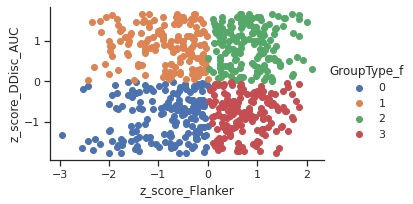

In [49]:
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=df, hue='GroupType_f', aspect=1.61)
fg.map(pyplot.scatter, 'z_score_Flanker', 'z_score_DDisc_AUC').add_legend()

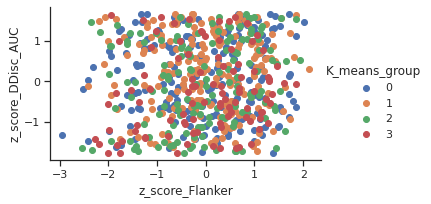

In [50]:
fg = seaborn.FacetGrid(data=df, hue='K_means_group', aspect=1.61)
fg.map(pyplot.scatter, 'z_score_Flanker', 'z_score_DDisc_AUC').add_legend()

In [ ]:
fg = seaborn.FacetGrid(data=df, hue='K_means_group', aspect=1.61)
fg.map(pyplot.scatter, 'Flanker_AgeAdj', 'z_score_compare').add_legend()